<a href="https://colab.research.google.com/github/stlmh/machine_learning/blob/main/%D0%A1%D1%82%D0%B5%D0%BB%D1%8C%D0%BC%D0%B0%D1%85_%D0%9F%D0%A0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

import category_encoders as ce

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 18.1k/18.1k [00:00<00:00, 22.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [ ]:
df = pd.read_csv(os.path.join(path, "CarPrice_Assignment.csv"))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Датасет: 205 авто, 26 стовпців (8 float, 8 int, 10 категоріальних) із технічними параметрами та ціною.
Ідентифікатори: car_ID, CarName; рейтинг ризику: symboling.
Категоріальні: fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem.
Габарити/маса: wheelbase, carlength, carwidth, carheight, curbweight.
Двигун: enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm.
Економія пального: citympg, highwaympg.
Цільова змінна: price.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.drop(['car_ID'], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Перевіримо, наскільки розподіл ознаки відхиляється від нормального (симетричного)
df.skew(numeric_only=True)

,0
symboling,0.211072
wheelbase,1.050214
carlength,0.155954
carwidth,0.904003
carheight,0.063123
curbweight,0.681398
enginesize,1.947655
boreratio,0.020156
stroke,-0.689705
compressionratio,2.610862


Дослідження на викиди
Викиди. Це спостереження, що істотно відхиляються від загальної структури даних. Причини: помилки збору/введення, рідкісні (але реальні) події, змішування різних популяцій.
Навіщо досліджувати. У лінійній регресії (MSE) окремі крайні значення можуть «перетягувати» оцінки коефіцієнтів, збільшувати дисперсію й порушувати припущення нормальності/гомоскедастичності; унаслідок цього погіршується узагальнювальна здатність моделі та коректність висновків.
Коли втручатися.
Якщо це явні артефакти/помилки — виправити або вилучити.
Якщо це рідкісні, але валідні події — краще пом’якшити вплив (лог-/Yeo–Johnson трансформації, вінзоризація, порогове «cap»), застосувати робастні методи (Huber/RANSAC, квантильна регресія) або моделі, стійкі до викидів (дерева/бустинг). Для задач виявлення аномалій викиди — це корисний «сигнал», їх зберігають.
Виявлення. Одновимірно: Z-score, IQR (межі Тьюкі), MAD (робастний аналог Z-score); багатовимірно: відстань Махаланобіса (бажано з робастною коваріацією), Isolation Forest/LOF. Пороги розраховуйте на train-вибірці, цільову змінну не включайте.

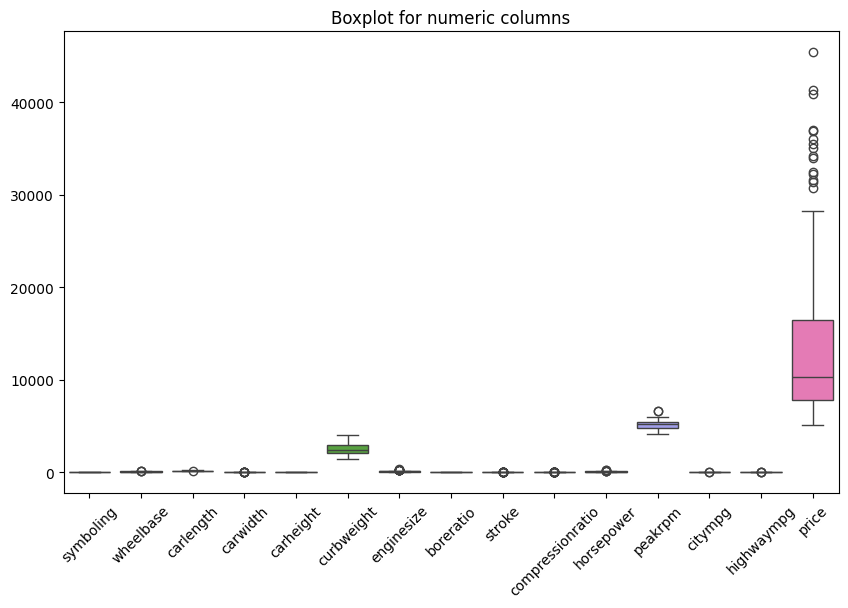

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for numeric columns")
plt.show()

За boxplot видно викиди (точки за межами “вусів”, тобто понад 1.5·IQR). Найбільш виражені — у price (багато високих значень), помітні також у horsepower, enginesize, curbweight, carwidth, compressionratio та місцями у peakrpm, citympg/highwaympg.
У carlength, carheight, boreratio, symboling викиди або відсутні, або поодинокі.

У коробчастій діаграмі “вуса” — це межі даних, що лежать у діапазоні
[Q1 − 1.5·IQR, Q3 + 1.5·IQR], де
Q1 — перший квартиль, Q3 — третій квартиль,
IQR = Q3 − Q1 (міжквартильний розмах).
Усі точки за межами цього інтервалу позначаються окремо і вважаються потенційними викидами.

In [ ]:
# Обчислюємо Z-оцінки для всіх числових стовпців
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Створюємо маску: True для всіх рядків, де Z-score < 3 у всіх стовпцях
mask = (abs(z_scores) < 3).all(axis=1)

# Фільтруємо датафрейм
df = df[mask].copy()

print(f"Було рядків: {len(df)}, після видалення викидів: {len(df)}")

Було рядків: 164, після видалення викидів: 164


In [ ]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


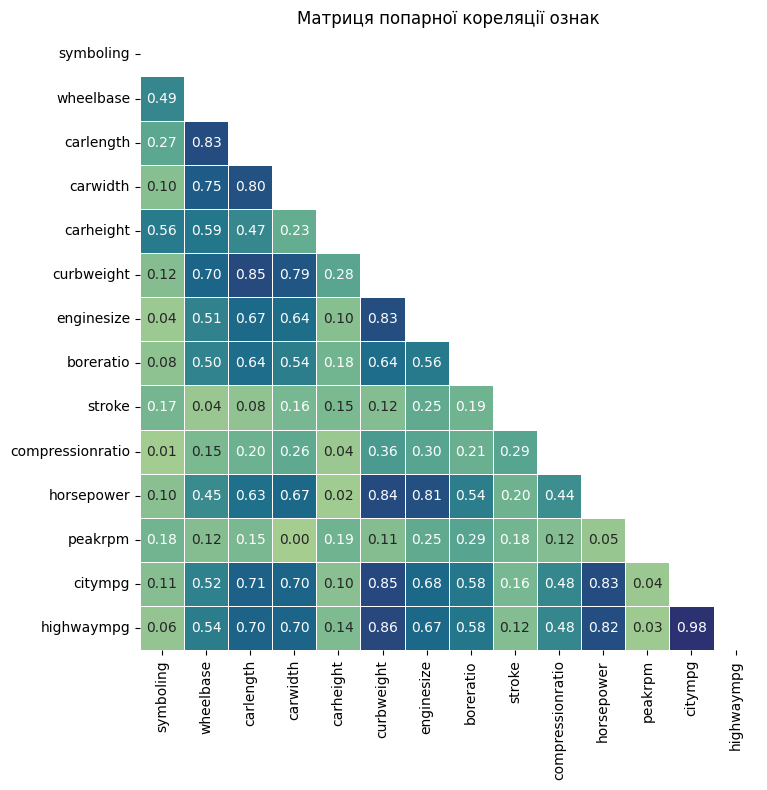

In [ ]:
mtx = df.drop('price', axis=1).corr(numeric_only=True).abs()

# Побудова графіка
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхню трикутну частину
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак")
plt.tight_layout()
plt.show()

Є щільна мультиколінеарність у кількох групах ознак (див. великі коефіцієнти на heatmap):
citympg – highwaympg: 0.97 → залишити одну (звично citympg), highwaympg видалити.
Розмір/маса: wheelbase – carlength (0.85), carlength – carwidth (0.83), carlength – curbweight (0.86), carwidth – curbweight (0.85)


Виводимо кількість унікальних значень за кожною з категоріальних ознак, приймаємо рішення застосувати до них один із методів кодування після розбивки набору даних на тренувальну та тестову вибірки.

In [ ]:
corr_price = df.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
corr_price

,price
price,1.000000
curbweight,0.833269
horsepower,0.813869
citympg,0.783996
highwaympg,0.771273
enginesize,0.735237
carwidth,0.731055
carlength,0.713961
wheelbase,0.609370
boreratio,0.529046


In [ ]:
to_drop = {'highwaympg', 'wheelbase', 'carlength', 'enginesize'}

present = list(to_drop & set(df.columns))
df1 = df.drop(columns=present).copy()

print("Видалено:", present)
print("Кількість ознак до/після:", df.shape[1], "→", df1.shape[1])

Видалено: ['highwaympg', 'enginesize', 'wheelbase', 'carlength']
Кількість ознак до/після: 25 → 21


Огляд категориальних ознак

In [ ]:
df1.select_dtypes(include='object').nunique()

,0
CarName,120
fueltype,1
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,1
enginetype,6
cylindernumber,4
fuelsystem,7


In [ ]:
# Розділяємо ознаки та цільову змінну
X = df1.drop('price', axis=1)
y = df1['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Для кодування категоріальних ознак використовуємо пакет categorical_encoders, з бібліотеки sklearn. Спочатку відбираємо категоріальні ознаки, а потім навчаємо наш екземпляр об’єкта TargetEncoder(енкодер) та використовуємо його для трансформації категоріальних ознак у тренувальному та тестовому наборах даних.

In [ ]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [ ]:
encoder = ce.TargetEncoder(cols=cat_cols)

In [ ]:
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

**Нормалізація змінних. Зменшення асиметрії**
Зменшити асиметрію розподілу числових ознак (після кодування всі ознаки в обох вибірках — тренувальній і тестовій — є числовими) і одночасно нормалізувати їх можна за допомогою об’єкта PowerTransformer пакета sklearn.

In [ ]:
power_transform = PowerTransformer().set_output(transform='pandas')

X_train = power_transform.fit_transform(X_train)
X_test = power_transform.transform(X_test)

Асиметрія розподілу початкових числових ознак у наборі даних зменшилась і наблизилась до 0, що означає, що їх розподіли тепер більше нагадують нормальні.

In [ ]:
X_train.skew()

,0
symboling,-0.066416
CarName,0.000000
fueltype,0.000000
aspiration,0.000000
doornumber,-0.233203
carbody,-0.207792
drivewheel,0.000000
enginelocation,0.000000
carwidth,0.000000
carheight,0.002604


In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

print("Побудовані моделі:", ", ".join(models.keys()))

Побудовані моделі: LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor, SVR


In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.799 | MAE: 1837.816 | MSE: 8139684.004
[Ridge] R²: 0.799 | MAE: 1840.242 | MSE: 8157049.764
[Lasso] R²: 0.799 | MAE: 1837.710 | MSE: 8141574.528
[RandomForestRegressor] R²: 0.986 | MAE: 2326.398 | MSE: 14083449.803
[GradientBoostingRegressor] R²: 0.995 | MAE: 2044.880 | MSE: 11657048.915
[SVR] R²: -0.119 | MAE: 3947.323 | MSE: 31080966.395


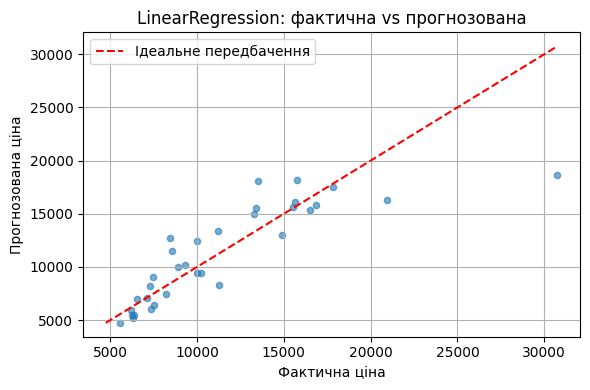

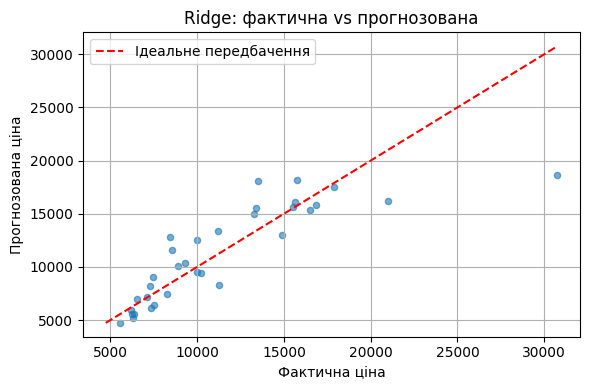

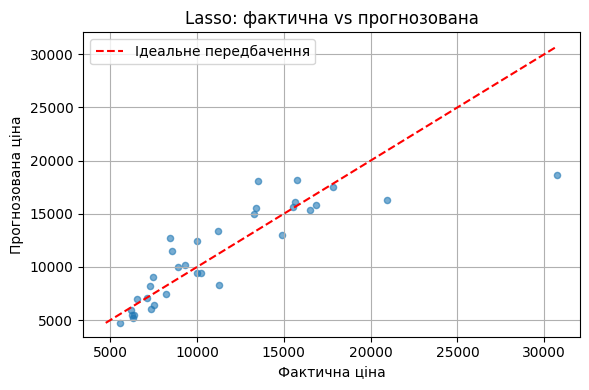

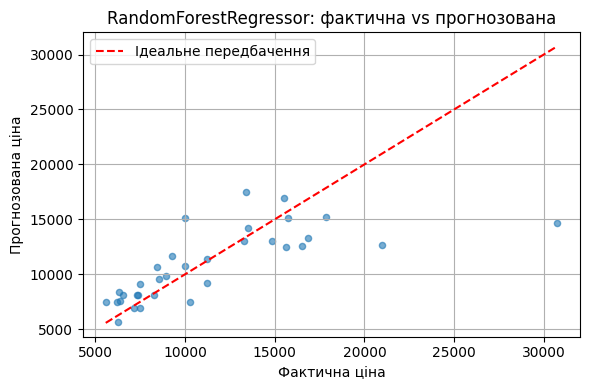

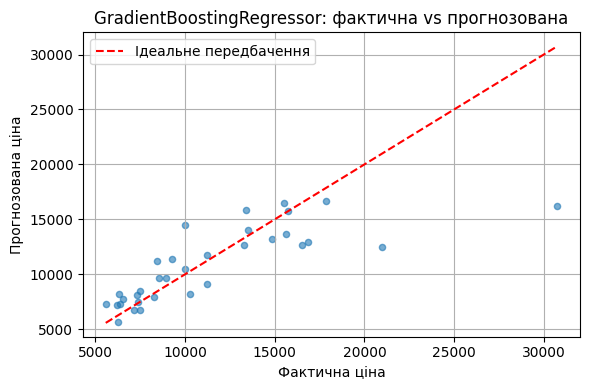

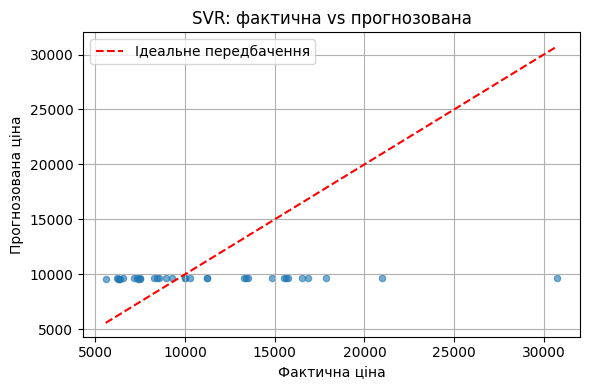

In [ ]:
y_true = np.asarray(y_test)
for name, res in results.items():
    y_pred = np.asarray(res["y_pred"]).ravel()
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())

    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, s=20, alpha=0.6)
    plt.plot([lo, hi], [lo, hi], 'r--', label='Ідеальне передбачення')
    plt.xlabel("Фактична ціна")
    plt.ylabel("Прогнозована ціна")
    plt.title(f"{name}: фактична vs прогнозована")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
rf_key = 'RandomForestRegressor' if 'RandomForestRegressor' in results else 'RandomForest'
y_rf = np.asarray(results[rf_key]["y_pred"]).ravel()

# Колонка ідентифікатора: беремо 'car_ID', якщо є, інакше — індекс тесту
if 'car_ID' in X_test.columns:
    id_name = 'car_ID'
    id_series = X_test['car_ID']
else:
    id_name = 'row_id'
    id_series = pd.Series(y_test.index, index=y_test.index)

df_rf = pd.DataFrame({
    id_name: id_series,
    'Actual': y_test,
    'Predicted_RF': y_rf
})
sample_rf = df_rf.sample(n=min(10, len(df_rf)), random_state=42).reset_index(drop=True)
print(sample_rf.to_string(index=False))

 row_id  Actual  Predicted_RF
     96  7499.0      6886.960
     34  7129.0      6898.910
    123  8921.0      9868.310
    135 15510.0     16976.980
    130  9295.0     11647.100
    181 15750.0     15162.670
     19  6295.0      8396.865
     21  5572.0      7450.110
     15 30760.0     14671.130
    170 11199.0     11421.510
